In [13]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import config

print(config.ROOT_FOLDER)

/Users/alexander.prams/autotune


In [14]:
with open(os.path.join(config.ROOT_FOLDER, 'experiment_results/hpo_dataset_optimizer_results.pickle'), 'rb') as handle:
    optimizer_results = pickle.load(handle)
    
meta_data = optimizer_results['meta']
del optimizer_results['meta']

In [15]:
# Optimizer results dict has structure [optimizer.name][classifier_name][dataset_idx][rep_id] -> optimizer output
optimizers = list(optimizer_results.keys())
classifiers = list(optimizer_results[optimizers[0]].keys())
n_datasets = len(optimizer_results[optimizers[0]][classifiers[0]])
n_reps_per_dataset = len(optimizer_results[optimizers[0]][classifiers[0]][0])
loss_ranges = meta_data['loss_ranges']

print("Optimizers: ", optimizers)
print("Classifiers: ", classifiers)
print("n_datasets: ", n_datasets)
print("n_reps_per_dataset", n_reps_per_dataset)

Optimizers:  ['TPE', 'RandomSearch', 'GA']
Classifiers:  ['libsvm_svc', 'liblinear', 'random_forest']
n_datasets:  5
n_reps_per_dataset 5


In [16]:
def results_to_numpy(optimizer_results, result_idx=1):
    np_results = {}
    for optimizer in optimizer_results:
        print(optimizer)
        tmp_results = {}

        opt_results = optimizer_results[optimizer]
        for classifier in opt_results:
            results = np.array(opt_results[classifier])
            results = np.array(results[:, :, :, result_idx], dtype=np.float32)
            print(results.shape)
            tmp_results[classifier] = -results
        np_results[optimizer] = tmp_results
    return np_results
        
loss_per_time_step = results_to_numpy(optimizer_results)
min_max_normalized_loss_per_time_step = {}
for o in list(loss_per_time_step.keys()):
    min_max_normalized_loss_per_time_step[o] = {}
    for c in list(loss_per_time_step[o].keys()):
        print(loss_per_time_step[o][c].shape)
        tmp_loss = loss_per_time_step[o][c]
        min_loss = loss_ranges[c][:, 0][:, None, None]
        max_loss = loss_ranges[c][:, 1][:, None, None]
        min_max_normalized_loss_per_time_step[o][c] = (tmp_loss - min_loss) / (max_loss - min_loss)

TPE
(5, 5, 10)
(5, 5, 10)
(5, 5, 10)
RandomSearch
(5, 5, 10)
(5, 5, 10)
(5, 5, 10)
GA
(5, 5, 10)
(5, 5, 10)
(5, 5, 10)
(5, 5, 10)
(5, 5, 10)
(5, 5, 10)
(5, 5, 10)
(5, 5, 10)
(5, 5, 10)
(5, 5, 10)
(5, 5, 10)
(5, 5, 10)


libsvm_svc
(5, 5, 10)


libsvm_svc
(5, 5, 10)
libsvm_svc
(5, 5, 10)


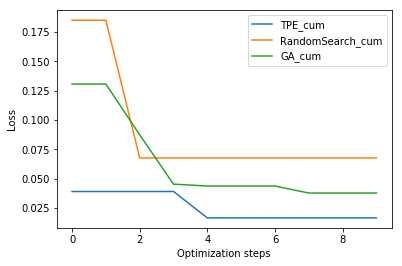

liblinear
(5, 5, 10)
liblinear
(5, 5, 10)
liblinear
(5, 5, 10)


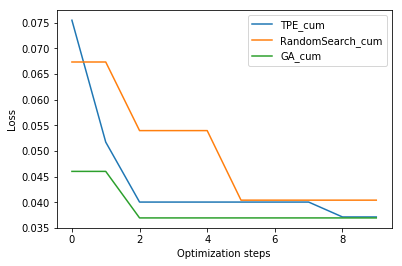

random_forest
(5, 5, 10)
random_forest
(5, 5, 10)
random_forest
(5, 5, 10)


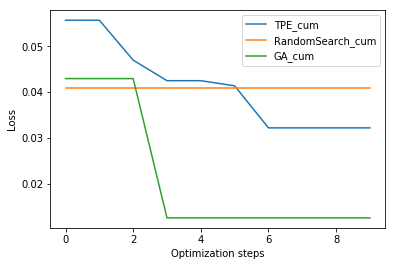

In [17]:
# Plot raw losses

def plot_results(np_results, dataset_idx=0, avg_datasets=False):
    for classifier in np_results[list(np_results.keys())[0]]:
        for optimizer in np_results:
            print(classifier)
            print(np_results[optimizer][classifier].shape)
            if avg_datasets:
                value_per_timestep = np.nanmean(np_results[optimizer][classifier], axis=(0, 1))
            else:
                value_per_timestep = np.nanmean(np_results[optimizer][classifier][dataset_idx], axis=(0))
            
            cumulative_min_data = [min(value_per_timestep[0:i+1]) for i in range(len(value_per_timestep))]
            #print(value_per_timestep.shape)
            plt.plot(cumulative_min_data, label=optimizer + "_cum")
            #plt.plot(value_per_timestep, label=optimizer)
        plt.xlabel("Optimization steps")
        plt.ylabel("Loss")
        plt.legend(loc='upper right')
        plt.show()

plot_results(loss_per_time_step)

libsvm_svc
(5, 5, 10)
libsvm_svc
(5, 5, 10)
libsvm_svc
(5, 5, 10)


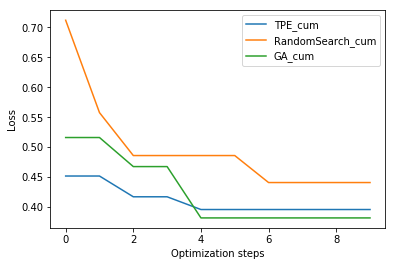

liblinear
(5, 5, 10)
liblinear
(5, 5, 10)
liblinear
(5, 5, 10)


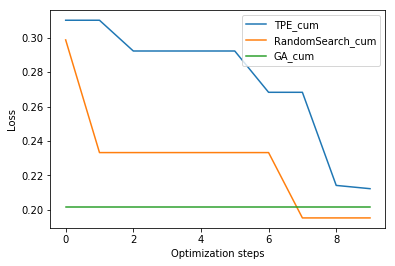

random_forest
(5, 5, 10)
random_forest
(5, 5, 10)
random_forest
(5, 5, 10)


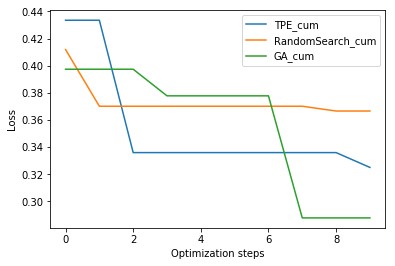

In [18]:
# Plot min max normalized losses

plot_results(min_max_normalized_loss_per_time_step, avg_datasets=True)